In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


# Ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

# set batch size
batch_size = 32


# training data
# training data loader

# testing data
# testing data loader

/tmp/ipykernel_145075/1633812161.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
directory = 'cs156b\cs156b_train_data_small' # change if necessary
csv_file = pd.read_csv('cs156b/train2023.csv')

df = csv_file

y_cols = ['No Finding', 'Enlarged Cardiomediastinum', 
            'Cardiomegaly', 'Lung Opacity', 'Pneumonia', 
            'Pleural Effusion', 'Pleural Other', 'Fracture', 
            'Support Devices']

# why are we doing this filling of NaN values to be 0?
csv_file[y_cols] = csv_file[y_cols].fillna(0)


Y = df[y_cols]

X = df["Path"]

print(X[:5],Y[:5])

0    train/pid50512/study1/view1_frontal.jpg
1    train/pid21580/study2/view1_frontal.jpg
2    train/pid21580/study1/view1_frontal.jpg
3    train/pid21580/study1/view2_lateral.jpg
4    train/pid33839/study1/view1_frontal.jpg
Name: Path, dtype: object    No Finding  Enlarged Cardiomediastinum  Cardiomegaly  Lung Opacity  \
0         1.0                         0.0           0.0           0.0   
1        -1.0                         0.0           0.0           1.0   
2        -1.0                         0.0           0.0           1.0   
3        -1.0                         0.0           0.0           1.0   
4        -1.0                         0.0           0.0           0.0   

   Pneumonia  Pleural Effusion  Pleural Other  Fracture  Support Devices  
0        0.0               0.0            0.0       0.0              1.0  
1        0.0               0.0            0.0       1.0              0.0  
2        0.0               0.0            0.0       1.0              0.0  
3        0

In [4]:
# # the file to get labels
# directory = 'cs156b\cs156b_train_data_small' # change if necessary
# csv_file = pd.read_csv('d')

# df = csv_file

# y_cols = ['No Finding', 'Enlarged Cardiomediastinum', 
#             'Cardiomegaly', 'Lung Opacity', 'Pneumonia', 
#             'Pleural Effusion', 'Pleural Other', 'Fracture', 
#             'Support Devices']

# # Y = df[df[y_cols].isin([1]).any(axis=1)]

# csv_file[y_cols] = csv_file[y_cols].fillna(0)

# data = []

# for subdir, dirs, files in os.walk(directory):
#     for filename in files:
#         if filename.endswith('.jpg'):
#             study = os.path.basename(subdir)
#             pid = os.path.basename(os.path.dirname(subdir))
#             path = f'train/{pid}/{study}/{filename}'
#             path_row = csv_file.loc[csv_file['Path'] == path]

#             # pneumonia = path_row['Pneumonia']
#             # fracture = path_row['Fracture']
#             # lung_opacity = path_row['Lung Opacity']

#             # data.append([f'{subdir}/{filename}', pneumonia, fracture, lung_opacity])


In [5]:
!  pip install imageio-ffmpeg

Defaulting to user installation because normal site-packages is not writeable


count: 1
count: 2
1 (2320, 2828) [-1. -1.  0.  0.  0. -1.  0.  0.  1.]


<Figure size 640x480 with 0 Axes>

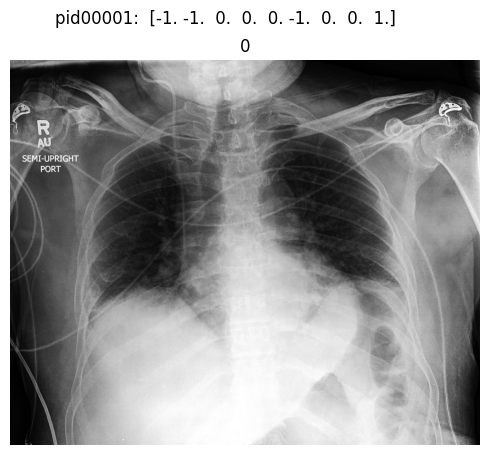

count: 3
count: 4
6 (2320, 2828) [-1. -1.  1.  1.  0.  0.  0.  0.  1.]
6 (2320, 2828) [-1. -1.  1.  1.  0.  0.  0.  0.  1.]
6 (2320, 2828) [-1. -1.  1.  1.  0.  0.  0.  0.  1.]
6 (2320, 2828) [-1. -1.  1.  1.  0.  0.  0.  0.  1.]
6 (2048, 2494) [-1. -1.  1.  1.  0.  0.  0.  0.  1.]
6 (2320, 2828) [-1. -1.  1.  1.  0.  0.  0.  0.  1.]
6 (2320, 2828) [-1. -1.  1.  1.  0.  0.  0.  0.  1.]
6 (2320, 2828) [-1. -1.  1.  1.  0.  0.  0.  0.  1.]


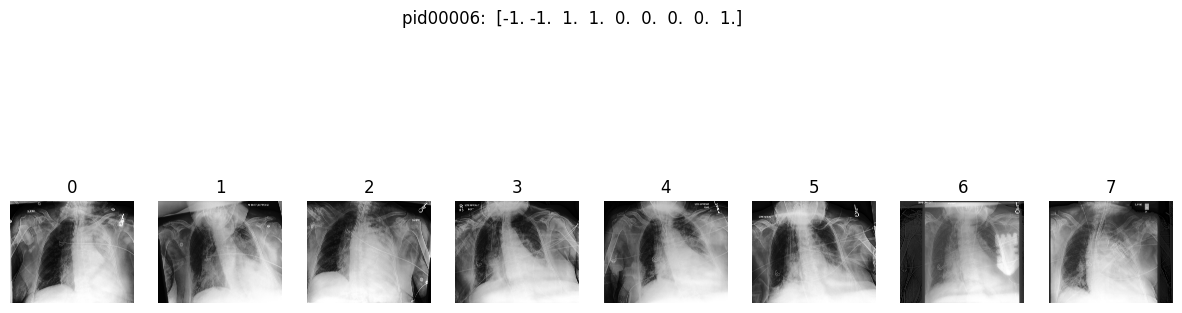

count: 5
7 (2320, 2828) [ 1. -1.  0.  0.  0. -1.  0.  0.  0.]


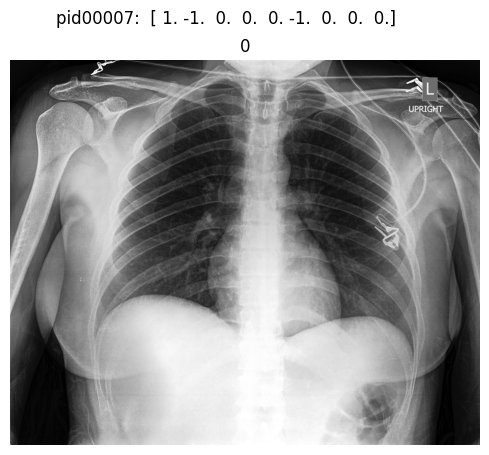

count: 6
count: 7
9 (2320, 2828) [ 1.  0.  0.  0.  0.  0.  0. -1.  0.]


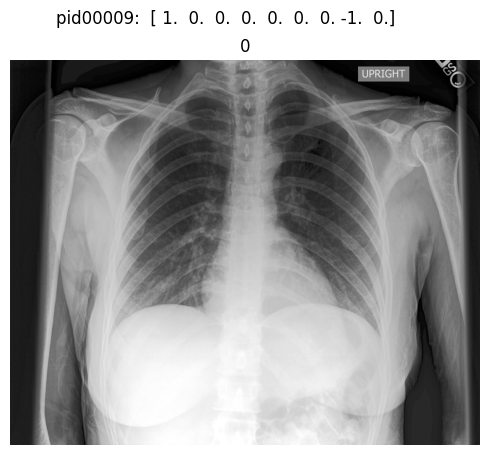

count: 8
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]
12 (2320, 2828) [-1.  0.  0.  1.  0.  1.  0.  0.  1.]


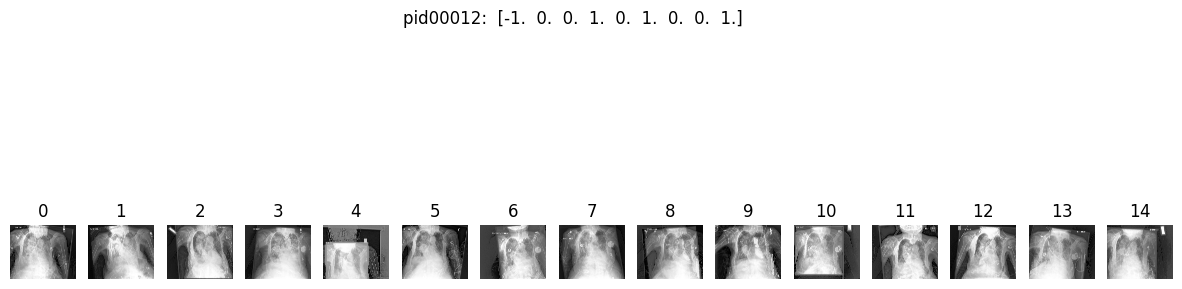

count: 9
13 (2022, 2022) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2022, 2022) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]
13 (2320, 2828) [-1.  0.  0.  0.  0.  0.  0.  0.  1.]


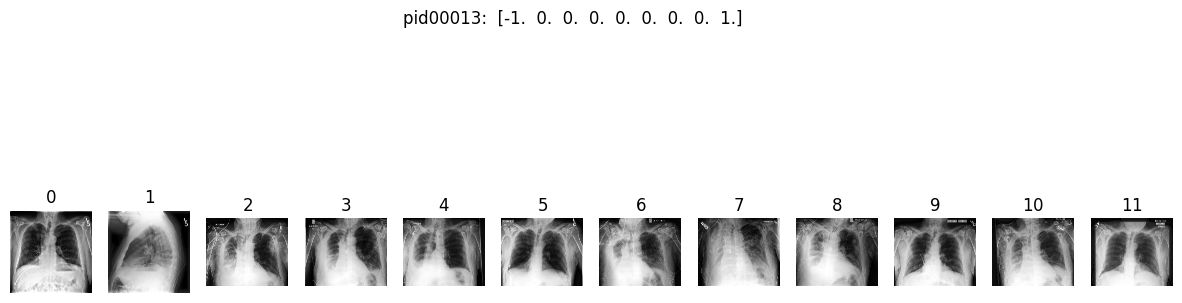

count: 10
count: 11
count: 12
count: 13
count: 14
count: 15
count: 16
22 (1858, 1795) [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]
22 (1862, 1795) [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]


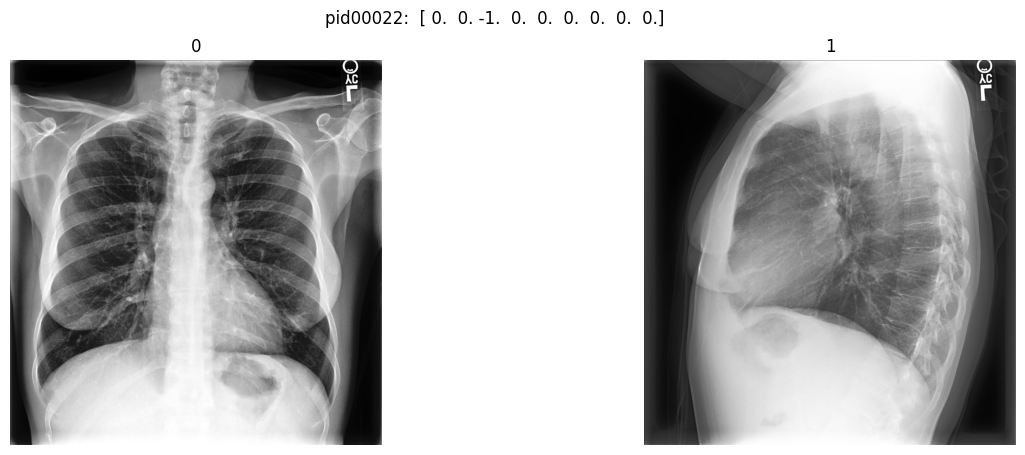

count: 17
count: 18
24 (1791, 2022) [-1.  0.  0.  0.  0.  0.  0.  0.  0.]
24 (2021, 1901) [-1.  0.  0.  0.  0.  0.  0.  0.  0.]


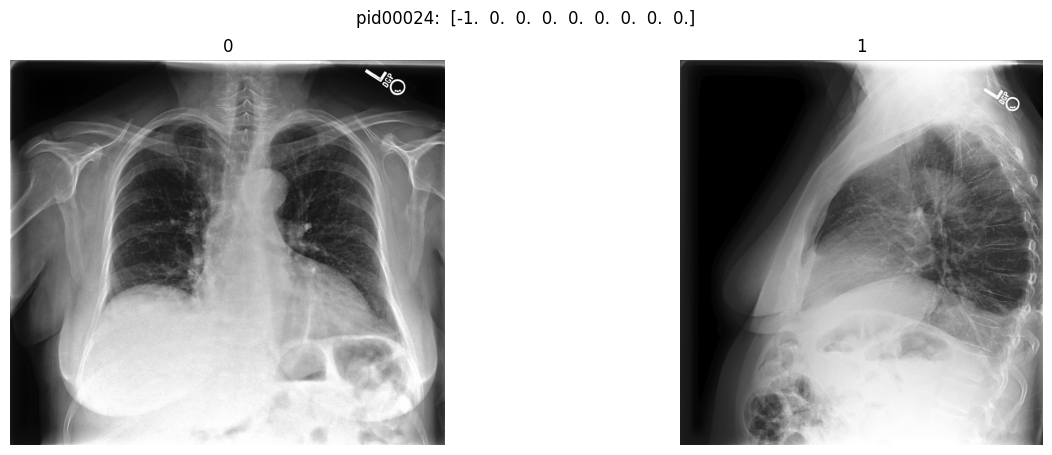

count: 19
25 (2022, 2012) [-1.  0.  0.  1.  1.  1.  0.  0.  0.]
25 (2022, 1751) [-1.  0.  0.  1.  1.  1.  0.  0.  0.]


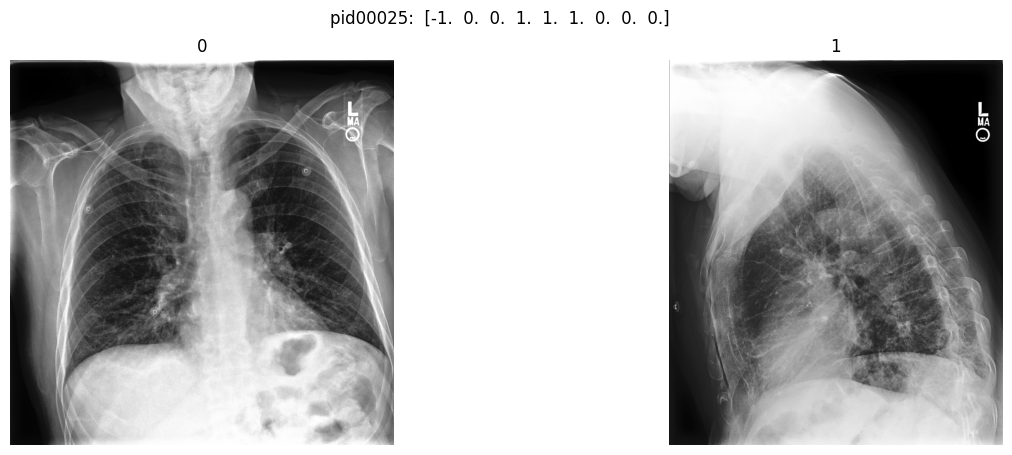

count: 20


In [13]:
# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform

class CustomDataset(Dataset):
    """My custom chexpert dataset"""
    
    def __init__(self, csv_file, root_dir, transform=None):

        """
        Args:
            csv_file (string): Path to the CSV file with annotations.
            root_dir (string): Directory with all the images.
                defaults to /groups/CS156b/data
                where we have images in data/train and data/test
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = pd.read_csv(csv_file)
        # self.root_dir = root_dir
        # self.root_dir = "/groups/CS156b/data"
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    # def __getitem__(self, idx):
    #     if torch.is_tensor(idx):
    #         idx = idx.tolist()

    #     # path of the images is in the "Path" Column in the form train/pid50512/study1/view1_frontal.jpg
    #     # idx will correspond to what comes after pid
        
    #     # need to find the rows in the "Path" column that are of form
    #     # train/pid{idx}/...
    #     # what comes after doesn't really matter right now
        
    #     idx_str = str(idx+1).zfill(5)
        
    #     print(f"idx_str: {idx_str}")
        
    #     pattern = f'train/pid{idx_str}/'
    #     mask = self.df['Path'].fillna('').str.contains(pattern)
    #     img_paths = self.df.loc[mask, 'Path'].tolist()

    #     print(f"img_paths: {img_paths}")
            
        
    #     # just pick the first image for now
    #     img_path = img_paths[0]
        
    #     # and for now remove the "train/" at the front
    #     img_path = img_path[6:]
        
    #     print(f"img_path: {img_path}")
        
    #     path = os.path.join(self.root_dir, img_path)
    #     try :
    #         image = io.imread(path)
    #     except:
    #         # skip to the next image
    #         return self.__getitem__(idx+1)
    #     # img_path = self.df.iloc[idx, 0]
        
    #     # print(f"img_path: {img_path}")
    #     # img_name = os.path.join(self.root_dir, img_path)
        
    #     # print(f"img_name: {img_name}")
    #     # image = io.imread(img_name)
    #     y_cols = ['No Finding', 'Enlarged Cardiomediastinum', 
    #         'Cardiomegaly', 'Lung Opacity', 'Pneumonia', 
    #         'Pleural Effusion', 'Pleural Other', 'Fracture', 
    #         'Support Devices']
    #     # labels within y_cols
    #     # replace nan with 0
    #     self.df[y_cols] = self.df[y_cols].fillna(0)
        
    #     labels = self.df[y_cols].iloc[idx]
    #     # landmarks = self.df.iloc[idx, 1:]
    #     # landmarks = np.array([landmarks], dtype=float).reshape(-1, 2)
    #     sample = {'image': image, 'labels': labels}

    #     if self.transform:
    #         sample = self.transform(sample)

    #     return sample
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        idx_str = str(idx).zfill(5)
        pattern = f'train/pid{idx_str}/'
        mask = self.df['Path'].fillna('').str.contains(pattern)
        img_paths = self.df.loc[mask, 'Path'].tolist()

        samples = []
        for img_path in img_paths:
            img_path = img_path[6:]  # Remove 'train/' prefix
            path = os.path.join(self.root_dir, img_path)
            try:
                image = io.imread(path)
            except:
                return [None]
            
            labels = self.df.loc[mask, ['No Finding', 'Enlarged Cardiomediastinum', 
                                        'Cardiomegaly', 'Lung Opacity', 'Pneumonia', 
                                        'Pleural Effusion', 'Pleural Other', 'Fracture', 
                                        'Support Devices']].fillna(0).values[0]
            sample = {'image': image, 'labels': labels}
            if self.transform:
                sample = self.transform(sample)
            samples.append(sample)

        return samples


# test it out
# dataset = CustomDataset(csv_file="my_data.csv")
customset = CustomDataset(csv_file='cs156b/train2023.csv', root_dir='cs156b/cs156b_train_data_small')


fig = plt.figure()


cnt = 0
# remove customset None until N elements

# print(customset[:5])

# fixme for some reason this cnt thing isn't working out it's kinda toxic

for (i, samples) in enumerate(customset):
    if None in samples:
        continue
    if cnt >= 20:
        break
    cnt += 1
    
    print(f"count: {cnt}")
    length = len(samples)
    if length == 0:
        continue
    # print the path to
    fig, axes = plt.subplots(1, length, figsize=(15, 5))  # Create subplots with one row and 'length' columns
    
    # Ensure axes is always iterable
    if length == 1:
        axes = [axes]  # Wrap the single Axes object in a list for consistency
    
    for j, (sample, ax) in enumerate(zip(samples, axes)):  # Iterate over samples and corresponding axes
        print(i, sample['image'].shape, sample['labels'])
        ax.set_title(f'${j}$')  # Set title for each subplot
        ax.axis('off')
        ax.imshow(sample['image'], cmap='gray')  # Plot the image in the subplot
        
    labl = samples[0]['labels']
    fig.suptitle(f'pid{str(i).zfill(5)}:  {labl}')  # Set the title for the entire figure
    plt.show()

    


# sample = customset[0]
# print(sample['image'].shape)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=(5,5), padding=(2,2)),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(p=0.1),

    nn.Conv2d(8, 8, kernel_size=(5,5), padding=(2,2)),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(p=0.1),

    nn.Flatten(),
    nn.Linear(7*7*8, 64),
    nn.ReLU(),
    nn.Linear(64, 10)

)
